In [11]:
import pandas as pd
from prettypandas import PrettyPandas
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
pluto = pd.read_csv('../data/nyc_pluto.csv', index_col=0)

C:\Users\Alex\Anaconda3\envs\nyc-buildings\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (19,20,22,23,24,25,66,67,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Zoning

Zoning is a set of regulations, set by the city government, which are designed to set limitations or directions as to what a particular lot can be used for. You wouldn't want to build an airport right next to a residential district, for example, or demolish a historical train station to build a stadium (the historical Penn Station in Midtown Manhattan, a second Grand Central, was demolished in the 1960s to make way for Madison Square Garden). The art of managing the growth of a city is to a large extent the art of managing its zoning, and this task has a whole complicated language&mdash;zoning districts, setbacks, floor area ratios, and so on&mdash;which is the peculiar domain of the lawyers, real estate developers, and architects.

If this somehow piques your interest, the New York City government portal has [a very readable and comprehensive summary on zoning in the city](http://www1.nyc.gov/site/planning/zoning/about-zoning.page).

For our purposes we will distinguish between residential, commercial, manufacturing, and park districts. We exclude areas without zonining, slot mixed manufacturing/residential zones into residential (because if you're still trying to manufacture something in New York City you're nuts), and ignore two especially special zoning areas, one in Queens, one [Battery Park City](https://en.wikipedia.org/wiki/Battery_Park_City), which apparently defy easy classification. We'll take the largest zone attached to an address (there can be multiple). We will ignore limited height districts, special zoning districts, [...]

You know what? None of this is really necessary. `LandUse` fullfills this category a million times better!

# Land use

In [5]:
ownership_by_type = pluto['OwnerType'].value_counts(dropna=False)
ownership_by_type['P'] += ownership_by_type[ownership_by_type.isnull().values[0]]
ownership_by_type = ownership_by_type[1:]
ownership_type_map = {  'P': 'Private',
                        'C': 'Public',
                        'M': 'Mixed',
                        'O': 'Public',
                        'X': 'Mixed'
                     }
ownership_by_type.index = [ownership_type_map[x] for x in ownership_by_type.index]
ownership_by_type = ownership_by_type.groupby([ownership_by_type.index]).sum().sort_values(ascending=False)
ownership_by_type = ownership_by_type.map(lambda x: x / 859464 * 100)
ownership_by_type.name = '%'
ownership_by_type.index.name = 'Use'

In [8]:
PrettyPandas(ownership_by_type).total()

In [9]:
codes = {1: 'One/Two-Family',
         2: 'Multi-Family Walkup',
         3: 'Multi-Family Elevator',
         4: 'Mixed Residential/Commercial',
         5: 'Commercial/Office',
         6: 'Industrial',
         7: 'Transport/Utility',
         8: 'Public Facility',
         9: 'Open/Green Space',
         10: 'Parking Lot',
         11: 'Vacant'}

land_use_data = pluto['LandUse'][pluto['LandUse'].notnull()].map(lambda x: codes[x]).value_counts()

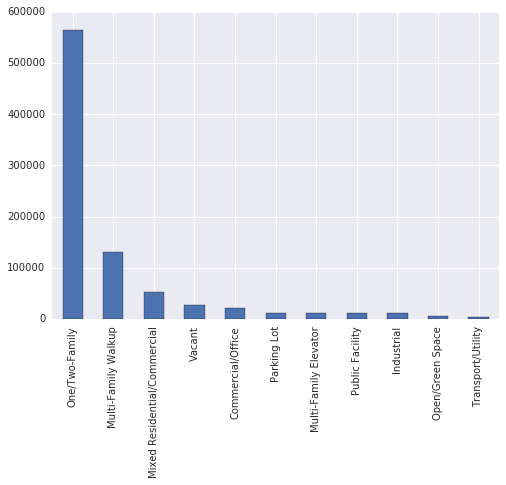

In [12]:
land_use_data.plot(kind='bar')

# Easements

The most curious case, trying to find that one with the most easements.

In [14]:
easements = pluto['Easements'].value_counts()
easements.index = [int(float(s)) for s in easements.index]
easements = easements.groupby(easements.index).sum().sort_index()

In [15]:
easements

0     849701
1       8621
2        191
3         62
4         17
5          9
6          3
7          1
8        443
9          1
15        11
28       145
Name: Easements, dtype: int64